In [96]:

import matplotlib.pyplot as plt
import csv

## read and cretae a panda frame
import pandas as pd

## read the csv file
df = pd.read_csv('history_batch_1_bad.csv')
df_health = pd.read_csv('history_batches_1_health.csv')
## 
df.tail()

,Unnamed: 0,timestamp,capacity_used,removed_flow_average_duration,removed_flow_byte_per_packet,average_flow_duration_on_table,packet_in_mean,packet_in_std_dev,flow_table_stats,removed_table_stats
20,20,1.715340e+09,0.08,11.557692,35.909188,75.708201,22.150000,24.629809,"[{6: 4}, {'10.0.0.1': 2, '10.0.0.2': 2}, {'10....","[{6: 312}, {'10.0.0.1': 163, '10.0.0.2': 149},..."
21,21,1.715340e+09,0.08,11.557692,35.909188,80.709614,21.095238,24.494712,"[{6: 4}, {'10.0.0.1': 2, '10.0.0.2': 2}, {'10....","[{6: 312}, {'10.0.0.1': 163, '10.0.0.2': 149},..."
22,22,1.715340e+09,0.08,11.557692,35.909188,85.697425,20.136364,24.331602,"[{6: 4}, {'10.0.0.1': 2, '10.0.0.2': 2}, {'10....","[{6: 312}, {'10.0.0.1': 163, '10.0.0.2': 149},..."
23,23,1.715340e+09,0.08,11.557692,35.909188,90.726091,19.260870,24.148485,"[{6: 4}, {'10.0.0.1': 2, '10.0.0.2': 2}, {'10....","[{6: 312}, {'10.0.0.1': 163, '10.0.0.2': 149},..."
24,24,1.715340e+09,0.08,11.557692,35.909188,95.773690,18.458333,23.951303,"[{6: 4}, {'10.0.0.1': 2, '10.0.0.2': 2}, {'10....","[{6: 312}, {'10.0.0.1': 163, '10.0.0.2': 149},..."


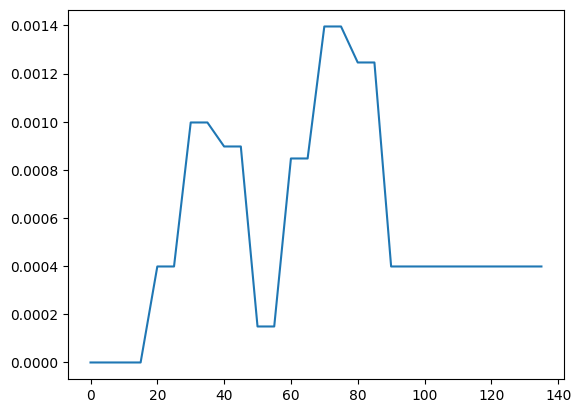

In [97]:
#show the capacity used in Tim
## timestamp is like 1715339594.1680713 delete the digits after the point
df['timestamp'] = df['timestamp'].apply(lambda x: int(x) - df['timestamp'][0]) 
df_health['timestamp'] = df_health['timestamp'].apply(lambda x: int(x) - int(df_health['timestamp'][0]))
plt.plot(df_health['timestamp'], df_health['capacity_used'])
# plt.show()


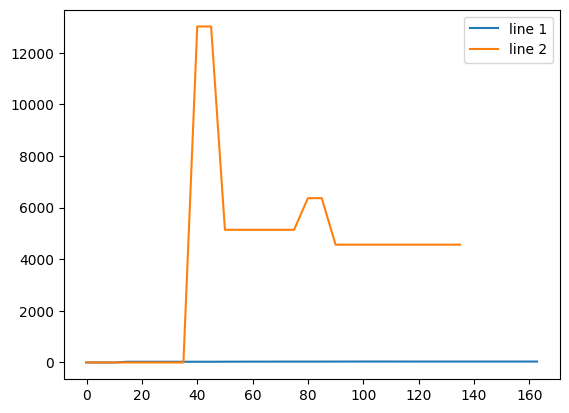

In [98]:
## plot the flow table duraitons in the plot
plt.plot(df['timestamp'], df['removed_flow_byte_per_packet'], label = "line 1")
plt.plot(df_health['timestamp'], df_health['removed_flow_byte_per_packet'], label = "line 2")
plt.legend()
plt.show()

In [99]:
result = df['flow_table_stats']
unique_keys = set()
for data in result:
  data = eval(data)
  for index, item in enumerate(data):
    if (index == 0):
      list = [f'proto_{i}'for i in item.keys()]
    if (index == 1):
      list = [f'ip_src_{i}'for i in item.keys()]
    if (index == 2):
      list = [f'ip_dst_{i}'for i in item.keys()]
    unique_keys.update(list)
df_flow_table = pd.DataFrame(columns = tuple(unique_keys))
count = 0
for item in result:
    item = eval(item)
    row_data = [None] * len(unique_keys)
    for index, proto in enumerate(item):
        for key, value in proto.items():
            if (index == 0):
                row_data[tuple(unique_keys).index(f'proto_{key}')] = value
            if (index == 1):
                row_data[tuple(unique_keys).index(f'ip_src_{key}')] = value
            if (index == 2):
                row_data[tuple(unique_keys).index(f'ip_dst_{key}')] = value
    df_flow_table.loc[count] = pd.Series(row_data, index=unique_keys)
    count+=1
    
result = df['removed_table_stats']
df_removed_flow_table = pd.DataFrame(columns = tuple(unique_keys))
count = 0
for item in result:
    item = eval(item)
    row_data = [None] * len(unique_keys)
    for index, proto in enumerate(item):
        for key, value in proto.items():
            if (index == 0):
                row_data[tuple(unique_keys).index(f'proto_{key}')] = value
            if (index == 1):
                row_data[tuple(unique_keys).index(f'ip_src_{key}')] = value
            if (index == 2):
                row_data[tuple(unique_keys).index(f'ip_dst_{key}')] = value
    df_removed_flow_table.loc[count] = pd.Series(row_data, index=unique_keys)
    count+=1

## append this to the previous data frame
dataframe_extended = pd.concat([df, df_flow_table, df_removed_flow_table], axis=1)
dataframe_extended.drop(['flow_table_stats', 'removed_table_stats'], axis=1, inplace=True)

In [100]:
result = df_health['flow_table_stats']
unique_keys = set()
for data in result:
  data = eval(data)
  for index, item in enumerate(data):
    if (index == 0):
      list = [f'proto_{i}'for i in item.keys()]
    if (index == 1):
      list = [f'ip_src_{i}'for i in item.keys()]
    if (index == 2):
      list = [f'ip_dst_{i}'for i in item.keys()]
    unique_keys.update(list)
df_flow_table = pd.DataFrame(columns = tuple(unique_keys))
count = 0
for item in result:
    item = eval(item)
    row_data = [None] * len(unique_keys)
    for index, proto in enumerate(item):
        for key, value in proto.items():
            if (index == 0):
                row_data[tuple(unique_keys).index(f'proto_{key}')] = value
            if (index == 1):
                row_data[tuple(unique_keys).index(f'ip_src_{key}')] = value
            if (index == 2):
                row_data[tuple(unique_keys).index(f'ip_dst_{key}')] = value
    df_flow_table.loc[count] = pd.Series(row_data, index=unique_keys)
    count+=1
    
result = df_health['removed_table_stats']
df_removed_flow_table = pd.DataFrame(columns = tuple(unique_keys))
count = 0
for item in result:
    item = eval(item)
    row_data = [None] * len(unique_keys)
    for index, proto in enumerate(item):
        for key, value in proto.items():
            if (index == 0):
                row_data[tuple(unique_keys).index(f'proto_{key}')] = value
            if (index == 1):
                row_data[tuple(unique_keys).index(f'ip_src_{key}')] = value
            if (index == 2):
                row_data[tuple(unique_keys).index(f'ip_dst_{key}')] = value
    df_removed_flow_table.loc[count] = pd.Series(row_data, index=unique_keys)
    count+=1

## append this to the previous data frame
dataframe_extended = pd.concat([df_health, df_flow_table, df_removed_flow_table], axis=1)
dataframe_extended.drop(['flow_table_stats', 'removed_table_stats'], axis=1, inplace=True)
dataframe_extended

In [101]:
dataframe_extended

,Unnamed: 0,timestamp,capacity_used,removed_flow_average_duration,removed_flow_byte_per_packet,average_flow_duration_on_table,packet_in_mean,packet_in_std_dev,ip_src_10.0.0.1,ip_src_10.0.0.2,...,proto_1,ip_dst_10.0.0.1,proto_17,ip_src_10.0.0.1,ip_src_10.0.0.2,ip_dst_10.0.0.2,proto_6,proto_1,ip_dst_10.0.0.1,proto_17
0,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
1,1,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
3,3,15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
4,4,20,0.000399,0.000000,0.000000,2.146337,1.500000,2.598076,4.0,4.0,...,4.0,4.0,None,NaN,NaN,NaN,NaN,NaN,NaN,None
5,5,25,0.000399,0.000000,0.000000,7.154111,1.600000,2.332381,4.0,4.0,...,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,6,30,0.000997,0.000000,0.000000,6.008159,2.666667,3.197221,4.0,16.0,...,4.0,16.0,12,NaN,NaN,NaN,NaN,NaN,NaN,None
7,7,35,0.000997,0.000000,0.000000,11.007907,2.285714,3.103652,4.0,16.0,...,4.0,16.0,12,NaN,NaN,NaN,NaN,NaN,NaN,None
8,8,40,0.000897,19.500000,13018.109519,8.578320,2.375000,2.912795,4.0,14.0,...,NaN,14.0,14.0,4.0,4.0,4.0,4.0,4.0,4.0,None
9,9,45,0.000897,19.500000,13018.109519,13.544292,2.111111,2.845833,4.0,14.0,...,NaN,14.0,14.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN
